# Proyecto
## Integrantes
- Juan Sebastian Ospina
- Juan Carlos Baez
- Dataset:  [Internet Firewall Data Set](https://archive.ics.uci.edu/ml/datasets/Internet+Firewall+Data)

### Entender el negocio
El dataset trata sobre los firewall, aquí podremos encontrar información sobre que acción toma un firewall
### Entender el dataset
- **Estructura:**
    - Cada registro se refiere a una conexión
- **Atributos:**  
  
    |Número atributo|Nombre atributo|Tipo|Descripción|
    |---------------|---------------|----|-----------|
    |1|Source Port|Entero|Hace referencia al puerto de origen|
    |2|Destination Port|Entero|Hace referencia al puerto de destino|
    |3|NAT Source Port|Entero|Hace referencia al puerto de origen de la NAT|
    |4|NAT Destination Port|Entero|Hace referencia al puerto de destino de la NAT|
    |5|Bytes|Entero|Bytes presentes en la conexión|
    |6|Bytes Sent|Entero|Bytes enviados en la conexión|
    |7|Bytes Received|Entero|Bytes recibidos en la conexión|
    |8|Packets|Entero|paquetes presentes en la conexión|
    |9|Elapsed Time (sec)|Entero|tiempo transcurrido en la conexión|
    |10|pkts_sent|Entero|Paquetes enviados en la conexión|
    |11|pkts_sent|Entero|Paquetes recibidos en la conexión|
    |12|Action|Discreto|Acción que toma el firewall (Clase del dataset)|
- **Clase:**
  
    |NO|Action|Descripción|
    |--|------|-----------|
    |1|allow|Acepta el tráfico de internet|
    |2|deny|Bloquea el tráfico y envía información al respecto|
    |3|drop|Bloquea el tráfico y no envía información al respecto|
    |4|reset-both|Resetea la conexión tanto del servido como del cliente|

In [105]:
# Importaciones
#%pip install matplotlib
#%pip install plotly
#%pip install pandas
#%pip install sklearn
#%pip install seaborn
#%pip install scipy
#%pip install numpy
#%pip install cufflinks
#%pip install ipywidgets
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.impute import KNNImputer as kn
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from IPython.display import Image, display, HTML
import cufflinks as cf
cf.set_config_file(sharing='public',theme='space',offline=True)
import ipywidgets as widgets 

In [2]:
# Carga del dataset
filename1 = 'Firewall.csv'
filename3 = 'FirewallNaN.csv'
filename4 = 'FirewallKNN3.csv'
filename5 = 'FirewallKNN10.csv'
dataPrev = pd.read_csv(filename1)
# Carga dataset puertos tcp para categorizacion
# https://github.com/maraisr/ports-list/blob/master/tcp.csv

# Incorporacion de datos faltantes

  Vamos a incluir los datos faltantes segun lo esperadon con el 10 porciento de los mismos, pero antes de esto para volver algo mas visual

In [3]:
# Cambio puertos por nombres
def portname(x):
    try:
      return puertos.query("port=="+str(x)).iloc[0,1].strip()
    except:
      return "Unassigned"
def cambio(dataset):
  dataset["Destination Port"]=dataset["Destination Port"].apply(portname)
  dataset["NAT Destination Port"]=dataset["NAT Destination Port"].apply(portname)
  dataset.insert(len(dataset.columns)-1, 'Action', dataset.pop('Action'))
  return dataset
#cambio()

In [4]:
# Insercion datos nulos
# Codigo adaptado de: https://www.analyticslane.com/2021/08/12/pandas-contar-los-valores-nulos-en-dataframe/
# https://www.delftstack.com/es/api/python-pandas/pandas-dataframe-dataframe.sample-function/
def nulos():
  dataNan = pd.read_csv(filename1)
  dataNan.insert(len(dataNan.columns)-1, 'Action', dataNan.pop('Action'))
  columnas = list(dataNan.loc[:,:'pkts_received'])
  for i in columnas:
      dataNan[i] = dataNan[i].sample(frac=0.9)
  dataNan.to_csv(filename3,index=False)
#nulos()
data = pd.read_csv(filename3)
print(data.isnull().sum()*100/data.shape[0])

Source Port             9.999695
Destination Port        9.999695
NAT Source Port         9.999695
NAT Destination Port    9.999695
Bytes                   9.999695
Bytes Sent              9.999695
Bytes Received          9.999695
Packets                 9.999695
Elapsed Time (sec)      9.999695
pkts_sent               9.999695
pkts_received           9.999695
Action                  0.000000
dtype: float64


Se puede apreciar que el 9,99% de los datos son faltantes como lo esperamos

# Exploracion del dataset

Feature: Destination Port


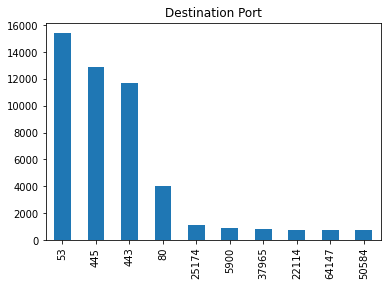

Feature: NAT Destination Port


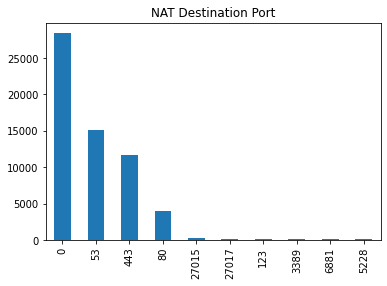

Feature: Source Port


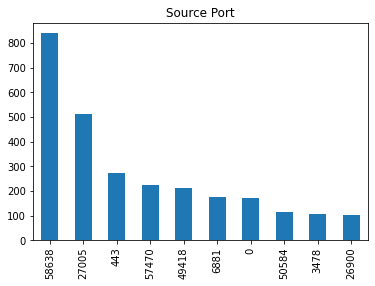

Feature: NAT Source Port


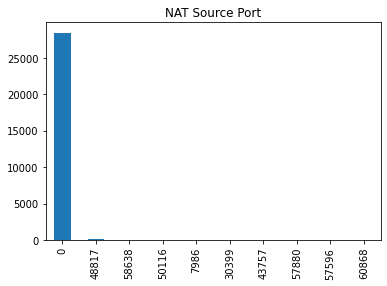

In [5]:
# Atributos Categoricos
# Codigo adaptado de https://www.kaggle.com/code/docxian/internet-firewall-analysis
features_cat = ['Destination Port', 'NAT Destination Port','Source Port','NAT Source Port']
for f in features_cat:
    print('Feature:', f)
    try:
      dataPrev[f].value_counts()[0:10].plot(kind='bar')
      plt.title(f)
      plt.show()
    except:
      pass



### Puertos de destino
Como vemos el puerto más utilizado pertenece a puertos que no tienen asignacion.
Tambien encontramos que se usan muchos puertos inseguros como telnet o http.

### Puertos de origen
Aunque estos puertos son escogidos aleatoriamente por el dispositivo, vemos que existe una tendencia a usar algunos puertos.

Action
allow         37640
deny          14987
drop          12851
reset-both       54
Name: Action, dtype: int64


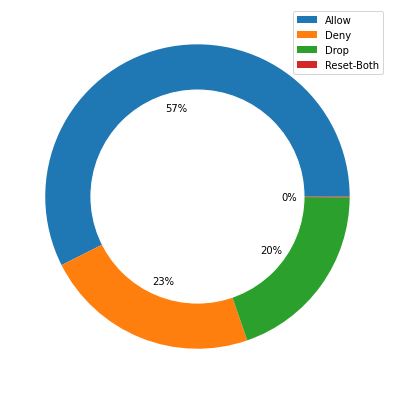

In [6]:
# Clase
# Codigo adaptado de https://es.acervolima.com/grafico-de-anillos-usando-matplotlib-en-python/,
# https://stackoverflow.com/questions/29786807/how-to-make-a-pie-chart-smaller-with-matplotlib
print(data.groupby('Action')['Action'].count())
labels = ["Allow","Deny","Drop","Reset-Both"]
my_circle = plt.Circle( (0,0), 0.7, color='white')
plt.pie(data.groupby('Action')['Action'].count(),autopct="%1.0f%%")
plt.legend(labels, loc="upper right")
p = plt.gcf()
p.set_size_inches(7,7)
p.gca().add_artist(my_circle)

### Clase
Más de la mitad de los registros son aceptados, seguido de el resto repartido en denegaciones y denegaciones sin aviso, puesto que casi no encontramos reseteos de servidores.

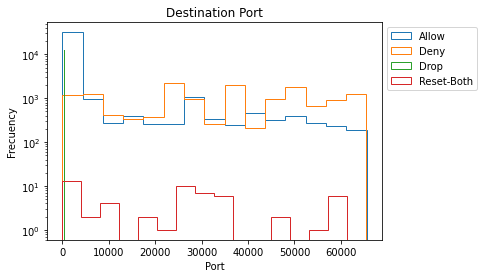

<Figure size 432x432 with 0 Axes>

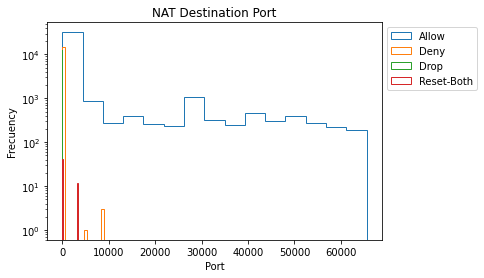

<Figure size 432x432 with 0 Axes>

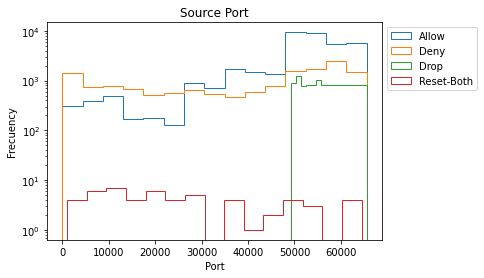

<Figure size 432x432 with 0 Axes>

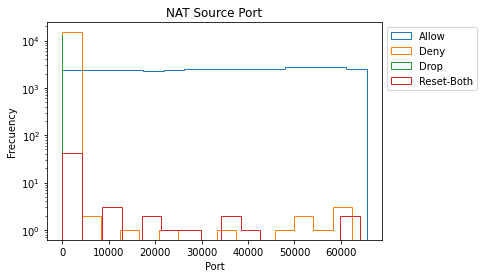

<Figure size 432x432 with 0 Axes>

In [7]:
# Categoricos vs Clase
# Codigo adaptado de,
# https://stackoverflow.com/questions/43872450/matplotlib-histogram-with-multiple-legend-entries,
# https://www.delftstack.com/es/howto/seaborn/seaborn-legend-position,
# https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.hist.html
for f in features_cat:
    plt.hist(dataPrev[dataPrev["Action"] == "allow"][f],histtype='step',log=True,bins=15)
    plt.hist(dataPrev[dataPrev["Action"] == "deny"][f],histtype='step',log=True,bins=15)
    plt.hist(dataPrev[dataPrev["Action"] == "drop"][f],histtype='step',log=True,bins=15)
    plt.hist(dataPrev[dataPrev["Action"] == "reset-both"][f],histtype='step',log=True,bins=15)
    plt.title(f)
    plt.ylabel("Frecuency")
    plt.xlabel("Port")
    plt.legend(labels,loc = 2, bbox_to_anchor = (1,1))
    plt.figure(figsize=(6,6))
    plt.show()

# Etapa de Preprocesamiento

  Para esta etapa para alivianar el data Set y mejorar el rendimiento vamos a eliminar columnas que no nos van a aportar informacion, como lo es el puerto de origen ya que se sabe que estos puertos siempre son generados de forma aleatoria por la maquina y aunque se vea una tendendencia, este es un poceso aleatorio.

In [8]:
def removeFloat(x):
  try:
    res=int(x)
  except:
    res=x
  return res
def integers(data3):
  for i in columnas:
    data3[i]=data3[i].apply(removeFloat)
  return data3

In [9]:
# Codigo adaptado de: 
# https://elmundodelosdatos.com/identificacion-valores-perdidos-python/
dataModa = data.copy()
columnas = list(data.loc[:,:'pkts_received'])
for i in columnas:
    dataModa[i] = dataModa[i].replace(np.nan,(dataModa[i].mode())[0])
integers(dataModa)
#Comprobacion datos nulos=0
print(dataModa.isnull().sum()*100/dataModa.shape[0])

Source Port             0.0
Destination Port        0.0
NAT Source Port         0.0
NAT Destination Port    0.0
Bytes                   0.0
Bytes Sent              0.0
Bytes Received          0.0
Packets                 0.0
Elapsed Time (sec)      0.0
pkts_sent               0.0
pkts_received           0.0
Action                  0.0
dtype: float64


In [10]:
# Codigo adaptado de:
# https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html
# https://medium.com/@kyawsawhtoon/a-guide-to-knn-imputation-95e2dc496e
def knnImputer(numK,filename):
    dataKNN = data.copy()
    dataKNN = dataKNN.loc[:,:'pkts_received']
    imputer = kn(n_neighbors=numK)
    dataKNN = pd.DataFrame(imputer.fit_transform(dataKNN).round(0))
    dataKNN.columns= columnas
    dataKNN = dataKNN.astype(int)
    dataKNN = pd.concat([dataKNN,data['Action']],axis=1,sort=False)
    dataKNN.to_csv(filename,index=False)
    #Guardamos este dataset porque los tiempos eran muy altos
#dataKNN3 = knnImputer(3,filename4)
#dataKNN10 = knnImputer(10,filename5)
dataKNN3 = pd.read_csv(filename4)
dataKNN10 = pd.read_csv(filename5)
# Comprobacion datos nulos = 0
print("DataKNN3 \n",dataKNN3.isnull().sum()*100/dataKNN3.shape[0])
print("DataKNN3 \n",dataKNN10.isnull().sum()*100/dataKNN3.shape[0])

DataKNN3 
 Source Port             0.0
Destination Port        0.0
NAT Source Port         0.0
NAT Destination Port    0.0
Bytes                   0.0
Bytes Sent              0.0
Bytes Received          0.0
Packets                 0.0
Elapsed Time (sec)      0.0
pkts_sent               0.0
pkts_received           0.0
Action                  0.0
dtype: float64
DataKNN3 
 Source Port             0.0
Destination Port        0.0
NAT Source Port         0.0
NAT Destination Port    0.0
Bytes                   0.0
Bytes Sent              0.0
Bytes Received          0.0
Packets                 0.0
Elapsed Time (sec)      0.0
pkts_sent               0.0
pkts_received           0.0
Action                  0.0
dtype: float64


## Normalizacion
  Se procede con una normalizacion de las siguientes columnas:

*    Bytes
* Bytes Sent
* Bytes Recived
* Packets
* Elapsed Time
* pkts_sent
* pkts_recived

Esto se debe a que encontramos valores muy amplios los cuales se pueden ver de forma muy clara en los diagrmas de caja acontinuacion, donde se ve una concentracion de datos donde esta la media y los cuartiles 1 y 3 pero despues de esto se puede ven una linea negra denotada por outliers dejando un rango muy amplio.


In [11]:
valoresANormalizar = data.loc[:,'Bytes':'pkts_received']
def minmax_norm(x):
    return (x - x.min()) / ( x.max() - x.min()) 
def normalizarDataset(dataset):
    for i in valoresANormalizar:
      dataset[i]=minmax_norm(dataset[i])
    return dataset

dataModa = normalizarDataset(dataModa)
dataKNN3 = normalizarDataset(dataKNN3)
dataKNN10 = normalizarDataset(dataKNN10)


In [37]:
#Codigo tomado del notebook de jupiter subido llamado DTExample
feature_cols = list(data.loc[:,:'pkts_received'])
def separador(dataset):
  x = dataset[feature_cols]
  y = dataset['Action']
  return split(x, y, test_size=0.3, random_state=1)
X_train_moda, X_test_moda, y_train_moda, y_test_moda = separador(dataModa) 
X_train_KNN3, X_test_KNN3, y_train_KNN3, y_test_KNN3 = separador(dataKNN3) 
X_train_KNN10, X_test_KNN10, y_train_KNN10, y_test_KNN10 = separador(dataKNN10) 

### LogisticRegression
Segun IBM "La regresión logística resulta útil para los casos en los que se desea predecir la presencia o ausencia de una característica o resultado según los valores de un conjunto de predictores. Es similar a un modelo de regresión lineal pero está adaptado para modelos en los que la variable dependiente es dicotómica. Los coeficientes de regresión logística pueden utilizarse para estimar la razón de probabilidad de cada variable independiente del modelo. La regresión logística se puede aplicar a un rango más amplio de situaciones de investigación que el análisis discriminante."  
  
Por lo que, al nuestra clase no ser dicotómica, puede que no resulte ser el clasificador más afín a nuestro dataset.

Información tomada de: https://www.ibm.com/docs/es/spss-statistics/SaaS?topic=regression-logistic  
Codigo adaptado de: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [13]:
clf = LogisticRegression(random_state=0, max_iter=500).fit(X_train_moda, y_train_moda)
y_predLR_moda=clf.predict(X_test_moda)
print("Imputacion por moda:",metrics.accuracy_score(y_test_moda,y_predLR_moda))


Imputacion por moda: 0.9502034587995931


c:\Users\juanb\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [14]:
clf = LogisticRegression(random_state=0, max_iter=500).fit(X_train_KNN3, y_train_KNN3)
y_predLR_KNN3=clf.predict(X_test_KNN3)
print("Imputacion por KNN3:",metrics.accuracy_score(y_test_KNN3,y_predLR_KNN3))

Imputacion por KNN3: 0.9507121057985758


In [15]:
clf = LogisticRegression(random_state=0, max_iter=500).fit(X_train_KNN10, y_train_KNN10)
y_predLR_KNN10=clf.predict(X_test_KNN10)
print("Imputacion por KNN10:",metrics.accuracy_score(y_test_KNN10,y_predLR_KNN10))

Imputacion por KNN10: 0.950559511698881


c:\Users\juanb\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



### GradientBoostingClassifier

Un modelo Gradient Boosting está formado por un conjunto de árboles de decisión individuales, entrenados de forma secuencial, de forma que cada nuevo árbol trata de mejorar los errores de los árboles anteriores. La predicción de una nueva observación se obtiene agregando las predicciones de todos los árboles individuales que forman el modelo.

#### Ventajas

- Son capaces de seleccionar predictores de forma automática.
- Pueden aplicarse a problemas de regresión y clasificación.
- Los árboles pueden, en teoría, manejar tanto predictores numéricos como categóricos sin tener que crear variables dummy o one-hot-encoding. En la práctica, esto depende de la implementación del algoritmo que tenga cada librería.
- Al tratarse de métodos no paramétricos, no es necesario que se cumpla ningún tipo de distribución específica.
- Por lo general, requieren mucha menos limpieza y pre procesado de los datos en comparación a otros métodos de aprendizaje estadístico (por ejemplo, no requieren estandarización).
- No se ven muy influenciados por outliers.
- Si para alguna observación, el valor de un predictor no está disponible, a pesar de no poder llegar a ningún nodo terminal, se puede conseguir una predicción empleando todas las observaciones que pertenecen al último nodo alcanzado. La precisión de la predicción se verá reducida pero al menos podrá obtenerse.
- Son muy útiles en la exploración de datos, permiten identificar de forma rápida y eficiente las variables (predictores) más importantes.
- Tienen buena escalabilidad, pueden aplicarse a conjuntos de datos con un elevado número de observaciones.
  
Tras esta información podemos afirmar que resulta un clasificador bastante afín, puesto que tenemos muchas observaciones y además tenemos a su vez outliers.

Información tomada de: https://www.cienciadedatos.net/documentos/py09_gradient_boosting_python.html  
Codigo adaptado de: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

In [16]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train_moda, y_train_moda)
y_predGBC_moda = clf.predict(X_test_moda)
print("Imputacion por moda:",metrics.accuracy_score(y_test_moda,y_predGBC_moda))

Imputacion por moda: 0.9861648016276704


In [63]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train_KNN3, y_train_KNN3)
y_predGBC_KNN3 = clf.predict(X_test_KNN3)
print("Imputacion por KNN3:",metrics.accuracy_score(y_test_KNN3,y_predGBC_KNN3))

Imputacion por KNN3: 0.9862156663275686


In [18]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train_KNN10, y_train_KNN10)
y_predGBC_KNN10 = clf.predict(X_test_KNN10)
print("Imputacion por KNN10:",metrics.accuracy_score(y_test_KNN10,y_predGBC_KNN10))

Imputacion por KNN10: 0.9824008138351984


### Support Vector Machines  
El objetivo del algoritmo SVM es encontrar un hiperplano que separe de la mejor forma posible dos clases diferentes de puntos de datos. “De la mejor forma posible” implica el hiperplano con el margen más amplio entre las dos clases, representado por los signos más y menos en la siguiente figura. El margen se define como la anchura máxima de la región paralela al hiperplano que no tiene puntos de datos interiores. El algoritmo solo puede encontrar este hiperplano en problemas que permiten separación lineal; en la mayoría de los problemas prácticos, el algoritmo maximiza el margen flexible permitiendo un pequeño número de clasificaciones erróneas.  

Tras ver la información de este clasificador, podría llegar a ser importante, dependiendo de lo que se demore procesando los datos y que tan bien pueda encontrar un hiperplano que logre separar las clases.

Información tomada de: https://la.mathworks.com/discovery/support-vector-machine.html  
Codigo adaptado de: https://scikit-learn.org/stable/modules/svm.html

In [75]:
clf = svm.SVC(decision_function_shape='ovo').fit(X_train_moda, y_train_moda)
y_predSVM_moda = clf.predict(X_test_moda)
print("Imputacion por moda:",metrics.accuracy_score(y_test_moda,y_predSVM_moda))

Imputacion por moda: 0.9200406917599186


In [76]:
clf = svm.SVC(decision_function_shape='ovo').fit(X_train_KNN3, y_train_KNN3)
y_predSVM_KNN3 = clf.predict(X_test_KNN3)
print("Imputacion por KNN3:",metrics.accuracy_score(y_test_KNN3,y_predSVM_KNN3))

Imputacion por KNN3: 0.9701932858596134


In [77]:
clf = svm.SVC(decision_function_shape='ovo').fit(X_train_KNN10, y_train_KNN10)
y_predSVM_KNN10 = clf.predict(X_test_KNN10)
print("Imputacion por KNN10:",metrics.accuracy_score(y_test_KNN10,y_predSVM_KNN10))

Imputacion por KNN10: 0.9690233977619532


### Elección Clasificador y Dataset por imputación

Tras realizar las clasificaciones con cada uno de los dataset por imputaciones y ver sus respectivos puntajes de precision, vemos como en cada uno de los clasificadores el dataset imputado por KNN3 resulta ser el que obtiene mayor puntaje.

En cuanto al clasificador, tenemos unos puntajes un poco parecidos en SVM y en GradientBoostedTrees, pero teniendo en cuenta que es un poco mejor el ultimo mencionado y que tiene un rendimiento en cuanto a tiempo mejor, vamos a usar GradientBoostedTrees.

Asi que procederemos en ahondar más en este mismo.


In [111]:
def BoostingInteractive(n):
    clfElegido = GradientBoostingClassifier(n_estimators=n, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train_KNN3, y_train_KNN3)
    y_predGBC_KNN3 = clfElegido.predict(X_test_KNN3)
    print("Precision con",n,"estimadores:",metrics.accuracy_score(y_test_KNN3,y_predGBC_KNN3))
    #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html
    ConfusionMatrixDisplay.from_predictions(y_test_KNN3,y_predGBC_KNN3)
    plt.show()
    # Visualización atributos más importantes 
    #Codigo adaptado del notebook de jupiter subido llamado RFExample
    feature_imp = pd.Series(clfElegido.feature_importances_,index=clfElegido.feature_names_in_).sort_values(ascending=False)
    sns.barplot(x=feature_imp, y=feature_imp.index)
    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title("Visualizing Important Features")
    plt.show()
    
widgets.interact(BoostingInteractive,n=[50,60,70,80,90,100])

interactive(children=(Dropdown(description='n', options=(50, 60, 70, 80, 90, 100), value=50), Output()), _dom_…

<function __main__.BoostingInteractive(n)>

# No supervisado

In [78]:
def separacionClase(dataset):  
  x = dataset[feature_cols]
  y = dataset['Action']
  return x,y
xModa, yModa = separacionClase(dataModa)
xKNN3, yKNN3 = separacionClase(dataKNN3)
xKNN10, yKNN10 = separacionClase(dataKNN10)

### K-Means Clustering

K-means es un algoritmo de clasificación no supervisada (clusterización) que agrupa objetos en k grupos basándose en sus características. El agrupamiento se realiza minimizando la suma de distancias entre cada objeto y el centroide de su grupo o cluster. Se suele usar la distancia cuadrática.

Información tomada de: https://www.unioviedo.es/compnum/laboratorios_py/kmeans/kmeans.html  
Codigo adaptado de: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [100]:
## https://www.aprendemachinelearning.com/k-means-en-python-paso-a-paso/
def kmeansclustering(datas,n,x,y):
  kmeans = KMeans(n_clusters=n).fit(datas)
  centroids = kmeans.cluster_centers_
  labels = kmeans.predict(datas)
  colores=['lavender','orchid','limegreen','deepskyblue','darkorange','red']
  asignar=[]
  for row in labels:
      asignar.append(colores[row])
  with plt.style.context('dark_background'):
    plt.scatter(datas[:, x], datas[:, y], marker='+', c=asignar,s=15)
    plt.scatter(centroids[:, x], centroids[:, y], marker='*', c=colores[:n],s=1000)
    plt.show()

In [102]:
def kmeansInteractivo(clusters,ejeX,ejeY):
    kmeansclustering(xKNN3.to_numpy(),clusters,ejeX,ejeY)
dicNames={"Source Port":0,"Destination Port":1,"NAT Source Port":2,"NAT Destination Port":3,"Bytes,Bytes Sent":4,"Bytes Received":5,"Packets":6,"Elapsed Time (sec)":7,"pkts_sent":8,"pkts_received,Action":9}
widgets.interact(kmeansInteractivo,clusters=(2,6,1),ejeX=dicNames,ejeY=dicNames)

interactive(children=(IntSlider(value=4, description='clusters', max=6, min=2), Dropdown(description='ejeX', o…

<function __main__.kmeansInteractivo(clusters, ejeX, ejeY)>

### Hierarchical Clustering

Hierarchical Clustering o agrupación jerárquica se subdivide en métodos aglomerativos, que proceden de una serie de fusiones de los n objetos en grupos. Este algoritmo puede representarse mediante un diagrama bidimensional conocido como dendrograma, que ilustra las fusiones o divisiones realizadas en cada etapa sucesivas del análisis.

Información tomada de: https://aprendeia.com/aprendizaje-no-supervisado-hierarchical-clustering/  
Codigo adaptado de: https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/

In [81]:
imagen = "dendogram.png"
xKNNH3 = xKNN3.sample(random_state=1, frac=0.1)
def dendogram():
    plt.figure(figsize=(10, 7))
    plt.title("Customer Dendograms")
    dend = shc.dendrogram(shc.linkage(xKNNH3, method='ward'))
    plt.savefig(imagen)
#dendogram()
Image(url=imagen, width=597,height=431)

In [82]:
cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
cluster.fit_predict(xKNNH3)

array([1, 4, 3, ..., 2, 2, 1], dtype=int64)

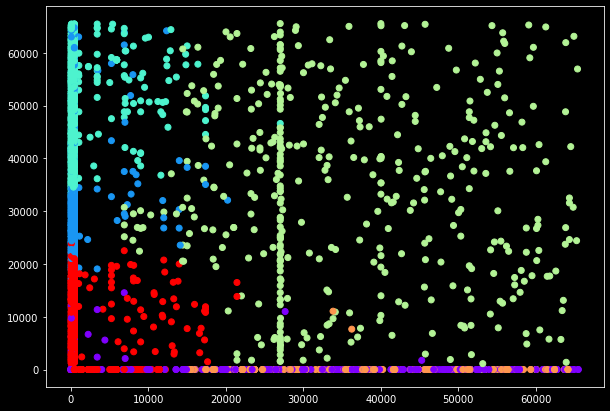

In [83]:
def plotCluster():
    with plt.style.context('dark_background'):
        plt.figure(figsize=(10, 7))
        plt.scatter(xKNNH3.to_numpy()[:,1], xKNNH3.to_numpy()[:,2], c=cluster.labels_, cmap='rainbow')
        plt.show()
plotCluster()